## Properties of Stars Exercises

***

## Project Description

Astronomy is one of the oldest data-driven sciences. In the late 1800s, the director of the Harvard College Observatory hired women to analyze astronomical data, which at the time was done using photographic glass plates. These women became known as the “Harvard Computers”. They computed the position and luminosity of various astronomical objects such as stars and galaxies. (If you are interested, you can learn more about the Harvard Computers External link). Today, astronomy is even more of a data-driven science, with an inordinate amount of data being produced by modern instruments every day.

In the following exercises we will analyze some actual astronomical data to inspect properties of stars, their absolute magnitude (which relates to a star's luminosity, or brightness), temperature and type (spectral class).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("stars.csv")

In [3]:
df

,star,magnitude,temp,type
0,Sun,4.80,5840,G
1,SiriusA,1.40,9620,A
2,Canopus,-3.10,7400,F
3,Arcturus,-0.40,4590,K
4,AlphaCentauriA,4.30,5840,G
...,...,...,...,...
91,*40EridaniB,11.10,10000,DA
92,*40EridaniC,12.80,2940,M
93,*70OphiuchiA,5.80,4950,K
94,*70OphiuchiB,7.50,3870,K


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   star       96 non-null     object 
 1   magnitude  96 non-null     float64
 2   temp       96 non-null     int64  
 3   type       96 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [5]:
df.describe()

,magnitude,temp
count,96.00,96.00
mean,4.26,8752.29
std,7.35,7727.86
min,-8.00,2500.00
25%,-1.80,3167.50
50%,2.40,5050.00
75%,11.32,9900.00
max,17.00,33600.00


In [6]:
df.columns

Index(['star', 'magnitude', 'temp', 'type'], dtype='object')

What is the mean magnitude?

In [7]:
df.magnitude.mean()

4.257291666666667

What is the standard deviation of magnitude?

In [8]:
df.magnitude.std()

7.354307649858819

Make a density plot of the magnitude. How many peaks are there in the data?

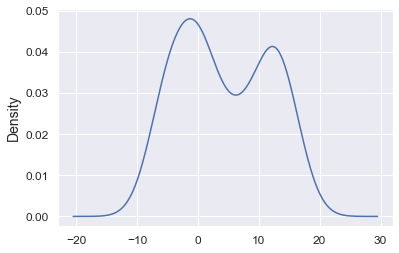

In [9]:
df["magnitude"].plot.kde()
plt.show()

Examine the distribution of star temperature. Which of these statements best characterizes the temperature distribution?

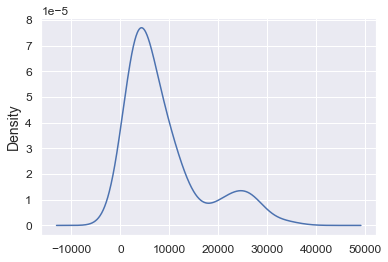

In [10]:
df["temp"].plot.kde()
plt.show()

Make a scatter plot of the data with temperature on the x-axis and  magnitude on the y-axis and examine the relationship between the variables. Recall that lower magnitude means a more luminous (brighter) star.
Most stars follow a trend. These are called main sequence stars.

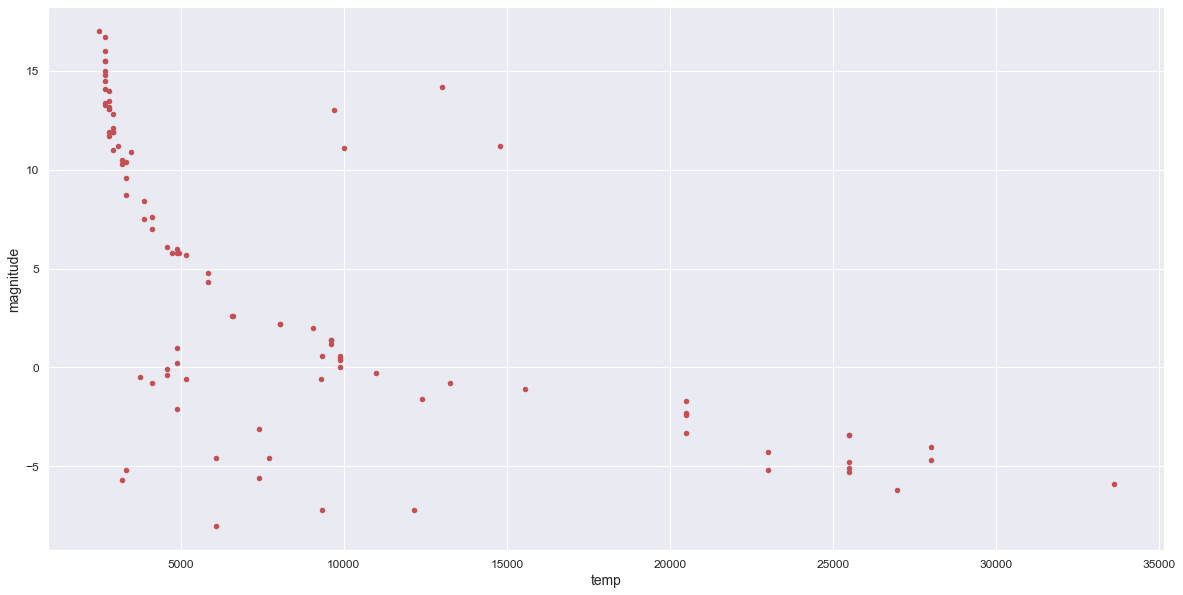

In [11]:
df.plot.scatter(x="temp", y="magnitude", c='r', figsize=(20,10))
plt.title('', fontsize=20)
plt.show()

The least lumninous star in the sample with a surface temperature over 5000K is

In [12]:
surface5000K = df[df["temp"] > 5000]

In [13]:
surface5000K.head()

,star,magnitude,temp,type
0,Sun,4.80,5840,G
1,SiriusA,1.40,9620,A
2,Canopus,-3.10,7400,F
4,AlphaCentauriA,4.30,5840,G
5,Vega,0.50,9900,A


In [14]:
surface5000K.sort_values(by="magnitude", ascending=False).head()

,star,magnitude,temp,type
85,vanMaanen'sStar,14.20,13000,DB
73,*ProcyonB,13.00,9700,DF
58,*SiriusB,11.20,14800,DA
91,*40EridaniB,11.10,10000,DA
71,TauCeti,5.70,5150,G


The two stars with lowest temperature and highest luminosity are known as supergiants. The two supergiants in this dataset are

In [15]:
df.sort_values(by="temp")

,star,magnitude,temp,type
75,G51-I5,17.00,2500,M
50,*ProximaCentauri,15.50,2670,M
53,Wolf359,16.70,2670,M
55,*L726-8,15.50,2670,M
56,*UVCeti,16.00,2670,M
...,...,...,...,...
48,Mirzam,-4.80,25500,B
32,Alnilam,-6.20,26950,B
19,BetaCrucis,-4.70,28000,B
21,Acrux,-4.00,28000,B


Remove the text labels and color the points by star type. This classification describes the properties of the star's spectrum, the amount of light produced at various wavelengths.

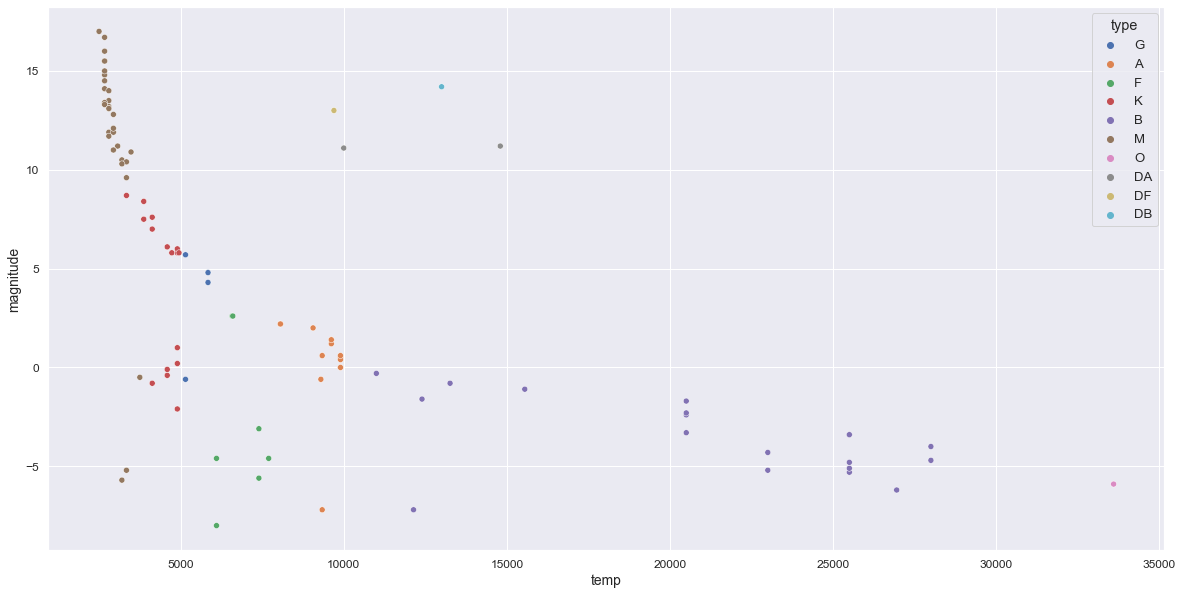

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="temp", y="magnitude", hue="type", data=df)
plt.title('', fontsize=20)
plt.show()

#### Python code done by Dennis Lam